## EDA: Failure Analysis in Power Transformers Dataset
https://www.kaggle.com/datasets/shashwatwork/failure-analysis-in-power-transformers-dataset/data

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import os 
import statsmodels.api as sm

In [55]:
failure_data = pd.read_csv("failure_data/Health index1.csv")
failure_data.head()


,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index,Life expectation
0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0,95.2,19.0
1,12886,61,25041,877,83,864,4,305,0,45.0,1.00,45,55,0,85.5,19.0
2,2820,16400,56300,144,257,1080,206,11,2190,1.0,1.00,39,52,11,85.3,19.0
3,1099,70,37520,545,184,1402,6,230,0,87.0,4.58,33,49,5,85.3,6.0
4,3210,3570,47900,160,360,2130,4,43,4,1.0,0.77,44,55,3,85.2,6.0


In [56]:
failure_data.describe()

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index,Life expectation
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,404.261702,8357.372340,47759.561702,79.695745,244.000000,1816.414894,162.923404,81.940426,91.491489,17.036596,1.849043,38.434043,53.495745,16.282979,27.504043,33.010426
std,2002.142678,14164.233283,13760.451816,489.320336,237.267485,2256.790519,1323.811504,342.573636,644.365828,46.735057,6.144009,6.178830,6.458906,17.115646,17.741458,17.791047
min,0.000000,57.000000,3600.000000,0.000000,10.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.050000,21.000000,27.000000,0.000000,13.400000,6.000000
25%,4.000000,496.000000,41700.000000,2.000000,66.000000,641.750000,0.000000,0.000000,0.000000,0.000000,0.570000,32.000000,51.000000,5.000000,13.400000,19.000000
50%,9.000000,3810.000000,49100.000000,3.000000,150.500000,1125.000000,3.000000,4.000000,0.000000,0.000000,1.000000,39.000000,54.000000,12.000000,13.400000,32.000000
75%,34.000000,14875.000000,55875.000000,7.000000,361.750000,2257.500000,6.000000,69.750000,0.000000,2.000000,1.000000,44.000000,56.000000,21.000000,38.550000,51.000000
max,23349.000000,249900.000000,85300.000000,7406.000000,1730.000000,24900.000000,16684.000000,5467.000000,9740.000000,227.000000,73.200000,57.000000,75.000000,183.000000,95.200000,51.000000


In [57]:
print(failure_data.columns)

Index(['Hydrogen', 'Oxigen', 'Nitrogen', 'Methane', 'CO', 'CO2', 'Ethylene',
       'Ethane', 'Acethylene', 'DBDS', 'Power factor', 'Interfacial V',
       'Dielectric rigidity', 'Water content', 'Health index',
       'Life expectation'],
      dtype='object')


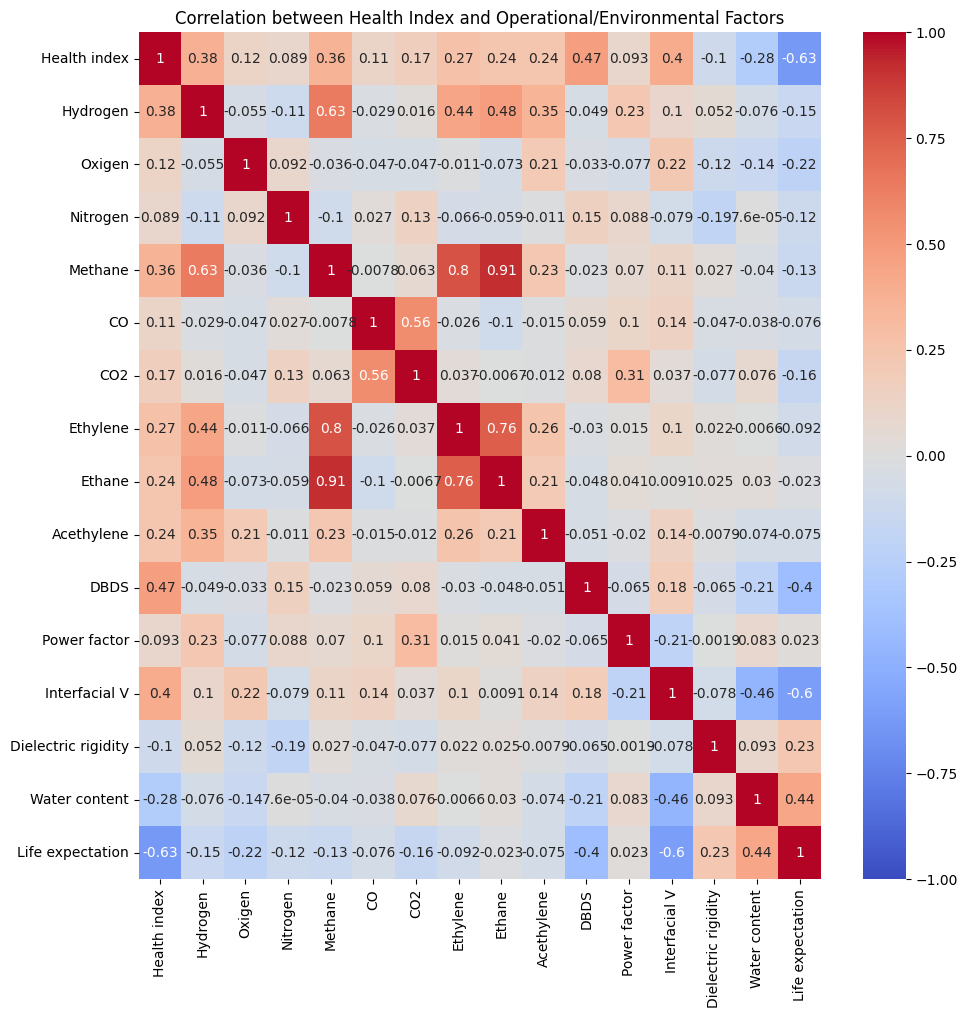

In [59]:
# For dissolved gas analysis, certain patterns of gas levels and ratios are indicative of different faults. 
# Explore Correlations
# Checking correlations for relevant numeric features (Health Index, Load, Environmental conditions, Operating hours)
correlation_matrix = failure_data[['Health index', 'Hydrogen', 'Oxigen', 'Nitrogen', 'Methane', 'CO', 'CO2', 'Ethylene','Ethane', 'Acethylene', 'DBDS',
                                     'Power factor', 'Interfacial V', 'Dielectric rigidity', 'Water content', 'Life expectation']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(11, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Health Index and Operational/Environmental Factors')
plt.show()

### Methodology for Calculating Health Index Based on Dissolved Gas Analysis Reports
**Dissolved Gas Analysis (DGA)** is a crucial technique for assessing the internal condition of electrical transformers. By analyzing the concentrations of specific gases dissolved in the transformer's insulating oil, it's possible to identify potential faults or degradation.

The faults that occur within transformer are broadly classified into two types namely 

    (i) internal incipient faults and 
    
    (ii) internal short circuit faults. 
    
The majority of incipient faults occurring in a power transformer give advance warning of a major break-down through the transformer oil gas analysis. During this period, the transformer may function well but it may cause some serious problems with insulation deterioration. The fault detection techniques such as dissolved gas analysis (DGA) [1], [2] and partial discharge analysis [3] are currently used for detection of incipient faults.

DGA is one of the earliest tool for the detection of incipient faults in transformers. Hydrocarbon oils are used as insulating fluids in transformers because of their high dielectric strength, heat transfer properties and chemical stability. Insulating material will decompose under the stress caused by thermal and electrical overload. The decomposition generates gaseous products, which dissolve in mineral oil. The nature and the amount of the individual gases extracted from the oil may be indicative of the type and degree of abnormality.

* Key Gases and Their Significance:

    **Hydrogen (H2):** Indicates overheating due to high currents or overloading.

    **Oxygen (O2):** Indicates exposure to air, possibly due to leaks or damaged seals.

    **Nitrogen (N2):** Can indicate exposure to air, but is also present in the transformer's insulating oil.

    **Methane (CH4):** Indicates overheating or arcing within the transformer.

    **Carbon Monoxide (CO):** Indicates overheating, arcing, or corona discharge.

    **Carbon Dioxide (CO2):** Indicates overheating or arcing, but can also be a product of oxidation.

    **Ethylene (C2H4):** Indicates overheating or arcing, especially in the presence of paper insulation.

    **Ethane (C2H6):** Indicates overheating or arcing, but is less sensitive than ethylene.

    **Acetylene (C2H2):** Indicates severe arcing or short circuits.

    **DBDS:** Indicates the presence of sulfur-containing compounds, which can be a sign of insulation degradation.

    **Power Factor:** Measures the energy loss in the transformer's insulation.

    **Interfacial Voltage:** Measures the ability of the insulating oil to withstand electrical stress.

    **Dielectric Rigidity:** Measures the ability of the insulating oil to withstand an electric field without breaking down.

    **Water Content:** Measures the amount of water present in the insulating oil, which can reduce its dielectric strength.

* Health Index Calculation Methodology:

1. Data Normalization: Normalize the gas concentrations to a common reference (e.g., ppm) to ensure comparability.
2. Weighting: Assign weights to each gas based on its sensitivity to different fault types. For example, acetylene might have a higher weight due to its strong association with severe arcing.
3. Gas Ratio Analysis: Calculate ratios between specific gases to identify fault patterns. Common ratios include:
    __CO/H2:__ Indicates the severity of overheating.
    __CH4/H2:__ Indicates the type of fault (overheating or arcing).
    __C2H4/H2:__ Indicates the severity of overheating in paper-insulated transformers.
    __Fault Classification:__ Use established fault classification models or expert systems to categorize the potential faults based on the gas concentrations and ratios.

Health Index Calculation: Combine the normalized gas concentrations, weighted values, and fault classification results into a single health index. This index can be calculated using various methods, such as:
* Weighted Sum: Sum the weighted gas concentrations and normalized ratios.
* Fuzzy Logic: Use fuzzy logic rules to combine the gas concentrations and fault classifications into a single index.
* Machine Learning: Train a machine learning model on historical DGA data to predict a health index based on the gas concentrations and other relevant features.

Additional Considerations:
__Trending Analysis:__ Track changes in the health index over time to identify deteriorating conditions.
__Thresholds:__ Establish thresholds for the health index to trigger maintenance or inspections.
__Contextual Factors:__ Consider other factors, such as transformer age, load, and operating environment, when interpreting the health index.
__Expert Knowledge:__ Incorporate expert knowledge and experience to refine the health index calculation and interpretation.
By following this methodology and considering the specific factors relevant to your application, you can effectively use DGA reports to assess the health of power transformers and make informed maintenance decisions.

In [60]:
# Explore low health index data
df_low_hidx = failure_data[failure_data["Health index"] < 50]
df_low_hidx.describe()

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index,Life expectation
count,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000
mean,24.954654,7904.443914,47503.260143,6.541766,236.992840,1699.735084,5.601432,44.630072,0.069212,14.857279,1.329451,38.147971,53.673031,16.715990,23.567064,34.788305
std,97.341383,8795.670477,13675.072091,15.701767,228.831758,1979.926324,17.939588,115.611497,0.947160,42.804595,1.943666,6.157973,6.104396,17.281459,13.931123,17.729566
min,0.000000,57.000000,3600.000000,0.000000,10.000000,93.000000,0.000000,0.000000,0.000000,0.000000,0.050000,21.000000,27.000000,1.000000,13.400000,6.100000
25%,3.000000,492.500000,41800.000000,2.000000,61.000000,622.500000,0.000000,0.000000,0.000000,0.000000,0.545000,32.000000,51.000000,5.000000,13.400000,19.000000
50%,8.000000,3910.000000,49300.000000,3.000000,133.000000,1040.000000,0.000000,2.000000,0.000000,0.000000,1.000000,38.000000,54.000000,12.000000,13.400000,50.700000
75%,24.000000,14904.000000,55650.000000,5.000000,357.500000,2220.000000,5.000000,64.500000,0.000000,2.000000,1.000000,43.500000,56.000000,22.000000,38.300000,51.000000
max,1450.000000,45100.000000,85300.000000,161.000000,1070.000000,24200.000000,248.000000,1850.000000,19.000000,203.000000,22.000000,57.000000,75.000000,183.000000,49.900000,51.000000


In [61]:
# explore high health index data
df_high_hidx = failure_data[failure_data["Health index"] >= 50]
df_high_hidx.describe()

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index,Life expectation
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.00000,51.000000,51.000000
mean,3520.529412,12078.490196,49865.254902,680.705882,301.568627,2775.019608,1455.431373,388.470588,842.588235,34.941176,6.117843,40.784314,52.039216,12.72549,59.849020,18.403922
std,5139.086765,34917.945867,14409.951535,1352.978349,294.109589,3734.945394,3811.055986,938.914508,1802.544759,69.305241,17.368131,5.896825,8.795364,15.38321,11.530644,9.849060
min,0.000000,61.000000,24991.000000,0.000000,20.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.120000,24.000000,28.000000,0.00000,50.000000,6.000000
25%,91.000000,586.500000,39433.500000,37.500000,93.500000,1190.500000,4.500000,13.000000,0.000000,0.000000,0.640000,37.000000,50.000000,4.00000,50.700000,6.500000
50%,590.000000,3564.000000,48500.000000,160.000000,184.000000,2010.000000,29.000000,43.000000,1.000000,0.000000,1.000000,43.000000,54.000000,6.00000,57.400000,19.000000
75%,6005.000000,12700.000000,59500.000000,641.500000,469.500000,2690.000000,774.500000,277.000000,647.500000,5.000000,1.255000,45.000000,55.000000,14.50000,60.900000,29.800000
max,23349.000000,249900.000000,80800.000000,7406.000000,1730.000000,24900.000000,16684.000000,5467.000000,9740.000000,227.000000,73.200000,52.000000,72.000000,77.00000,95.200000,30.200000


In [62]:
# Calculate the covariance matrix of low health index data
# For example, correlations between gases during a fault (e.g., high acetylene (C₂H₂) might correlate with higher ethylene (C₂H₄) during arcing)
# subset df_low_hidx to only include Acethylene, Ethylene 

DGA typically involves monitoring the following gases to assess the condition of the transformer:

- Hydrogen (H2)
- Methane (CH4)
- Ethylene (C2H4)
- Ethane (C2H6)
- Acetylene (C2H2)
- Carbon Monoxide (CO)
- Carbon Dioxide (CO2)

These gases can signal problems like overheating, partial discharges, arcing, or oil degradation. The health index is usually derived from a combination of these DGA values along with other factors like load, temperature, and maintenance history.

### Steps to Reverse Engineer the Health Index Calculation:
1. Identify DGA Parameters:
The key DGA gases and their levels should be linked to specific transformer faults, e.g., high Acetylene (C2H2) indicates arcing, high Hydrogen (H2) signals partial discharges.

2. Determine Fault Thresholds:
Each gas typically has a threshold value above which the transformer is considered to be at risk. These thresholds help determine the severity of issues like overheating, insulation breakdown, or electrical discharge.

3. Weight the Gases:
Gases related to more severe transformer conditions (e.g., acetylene for arcing) are usually given higher weights in the calculation of the health index. The health index formula might assign different weights to each gas depending on its impact on transformer health.

4. Other Factors Influencing the Health Index:
__Operational Data:__ Transformer load, operating hours, environmental conditions (temperature, pressure).
__Maintenance History:__ Preventive vs corrective maintenance, and how often maintenance is required.
__Alerts/Incidents:__ Number of alerts and incidents, such as overloading or environmental factors (storms).
__Approximate Health Index Formula:__ The health index might follow a formula that combines gas levels with operating conditions. A simple weighted sum might look like this:

![HI_equ1](HI_equ1.png)


Mapping Health Index to a Score: The resulting score from the above formula can then be mapped to a health index, with 100 being a healthy transformer and lower values indicating worsening conditions.

Next Steps:
Identify the Gas Ranges: Use the existing DGA values from your dataset and set appropriate thresholds based on industry standards or empirical data.
Use Historical Data: If you have historical health index data, we can reverse-engineer the weights based on regression or optimization techniques to find a formula that fits the observed health index values.
Implement the Calculation: I can help write a function to compute the health index based on your dataset, using assumptions or fitting the existing health index values.

In [63]:
from sklearn.linear_model import LinearRegression
import numpy as np

health_index_data = failure_data

# Define arbitrary industry threshold values for each gas (in ppm) based on known transformer fault analysis
gas_thresholds = {
    'Hydrogen': 150,      # H2
    'Methane': 100,       # CH4
    'Ethane': 65,         # C2H6
    'Ethylene': 50,       # C2H4
    'Acethylene': 300,      # C2H2 (Acetylene, indicator of arcing)
    'CO': 500,            # CO
    'CO2': 3000,          # CO2
}

# Normalize the gas concentrations based on the threshold values
normalized_gases = pd.DataFrame()

for gas in gas_thresholds.keys():
    normalized_gases[gas] = health_index_data[gas] / gas_thresholds[gas]

# Prepare the target variable (Health Index)
y = health_index_data['Health index']

# Create the input features by using the normalized gas concentrations
X = normalized_gases

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients (weights) for each gas and intercept
coefficients = model.coef_
intercept = model.intercept_

# Predict the Health Index based on the model
y_pred = model.predict(X)
y_pred

# Display the estimated coefficients, intercept, and the predicted Health Index for the first few rows
coefficients, intercept, pd.DataFrame({'Actual Health Index': y, 'Predicted Health Index': y_pred}).head()


(array([ 0.17158638,  2.38977108, -1.476441  , -0.01477605,  1.15945852,
         0.55060633,  2.74652077]),
 np.float64(24.761200975776283),
    Actual Health Index  Predicted Health Index
 0                 95.2               77.184283
 1                 85.5               54.413208
 2                 85.3               40.853365
 3                 85.3               35.302671
 4                 85.2               33.640804)

In [64]:
###___________________________
health_index_augdata = pd.read_csv("failure_data/health_index_augdata.csv") 
health_index_augdata.describe()

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,...,Health index,Life expectation,TransformerLoad,Temperature,Pressure,Vibration,Humidity,Precipitation,OperatingHours,HealthIndex
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,...,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,404.261702,8357.372340,47759.561702,79.695745,244.000000,1816.414894,162.923404,81.940426,91.491489,17.036596,...,27.504043,33.010426,2794.489074,49.749742,1.050567,2.561765,54.629163,24.677443,25267.972553,27.504043
std,2002.142678,14164.233283,13760.451816,489.320336,237.267485,2256.790519,1323.811504,342.573636,644.365828,46.735057,...,17.741458,17.791047,1314.879150,17.367430,0.085517,1.444721,25.670455,14.322626,14168.105616,17.741458
min,0.000000,57.000000,3600.000000,0.000000,10.000000,48.000000,0.000000,0.000000,0.000000,0.000000,...,13.400000,6.000000,522.229914,20.193096,0.900470,0.100057,10.179292,0.032670,1011.124873,13.400000
25%,4.000000,496.000000,41700.000000,2.000000,66.000000,641.750000,0.000000,0.000000,0.000000,0.000000,...,13.400000,19.000000,1612.108373,34.449194,0.982643,1.380175,32.368590,12.370560,12831.654391,13.400000
50%,9.000000,3810.000000,49100.000000,3.000000,150.500000,1125.000000,3.000000,4.000000,0.000000,0.000000,...,13.400000,32.000000,2866.023600,50.359837,1.051758,2.548277,56.023229,24.132824,24700.278447,13.400000
75%,34.000000,14875.000000,55875.000000,7.000000,361.750000,2257.500000,6.000000,69.750000,0.000000,2.000000,...,38.550000,51.000000,3924.621161,64.244876,1.124255,3.845656,75.945238,37.532184,37694.852474,38.550000
max,23349.000000,249900.000000,85300.000000,7406.000000,1730.000000,24900.000000,16684.000000,5467.000000,9740.000000,227.000000,...,95.200000,51.000000,4997.361766,79.900851,1.198631,4.989322,99.900335,49.977885,49790.988151,95.200000


In [65]:
# remove column "Health Index" from health_index_augdata
health_index_augdata.drop("Health index", axis=1, inplace=True)
health_index_augdata.describe()

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,...,Water content,Life expectation,TransformerLoad,Temperature,Pressure,Vibration,Humidity,Precipitation,OperatingHours,HealthIndex
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,...,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,404.261702,8357.372340,47759.561702,79.695745,244.000000,1816.414894,162.923404,81.940426,91.491489,17.036596,...,16.282979,33.010426,2794.489074,49.749742,1.050567,2.561765,54.629163,24.677443,25267.972553,27.504043
std,2002.142678,14164.233283,13760.451816,489.320336,237.267485,2256.790519,1323.811504,342.573636,644.365828,46.735057,...,17.115646,17.791047,1314.879150,17.367430,0.085517,1.444721,25.670455,14.322626,14168.105616,17.741458
min,0.000000,57.000000,3600.000000,0.000000,10.000000,48.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,6.000000,522.229914,20.193096,0.900470,0.100057,10.179292,0.032670,1011.124873,13.400000
25%,4.000000,496.000000,41700.000000,2.000000,66.000000,641.750000,0.000000,0.000000,0.000000,0.000000,...,5.000000,19.000000,1612.108373,34.449194,0.982643,1.380175,32.368590,12.370560,12831.654391,13.400000
50%,9.000000,3810.000000,49100.000000,3.000000,150.500000,1125.000000,3.000000,4.000000,0.000000,0.000000,...,12.000000,32.000000,2866.023600,50.359837,1.051758,2.548277,56.023229,24.132824,24700.278447,13.400000
75%,34.000000,14875.000000,55875.000000,7.000000,361.750000,2257.500000,6.000000,69.750000,0.000000,2.000000,...,21.000000,51.000000,3924.621161,64.244876,1.124255,3.845656,75.945238,37.532184,37694.852474,38.550000
max,23349.000000,249900.000000,85300.000000,7406.000000,1730.000000,24900.000000,16684.000000,5467.000000,9740.000000,227.000000,...,183.000000,51.000000,4997.361766,79.900851,1.198631,4.989322,99.900335,49.977885,49790.988151,95.200000


[95.2 85.5 85.3 85.2 75.6 73.2 72.8 68.  63.4 61.3 60.5 59.3 58.3 58.
 57.4 56.  55.8 55.1 51.6 51.5 50.7 50.6 50.3 50.  49.9 49.2 49.1 49.
 48.9 48.5 48.3 48.2 48.1 47.9 46.6 45.3 40.  38.6 38.4 38.3 38.1 38.
 36.6 36.4 33.6 31.  28.1 26.7 26.6 23.  22.5 21.9 21.7 21.6 19.8 19.5
 17.5 16.6 16.2 13.9 13.8 13.7 13.6 13.5 13.4]


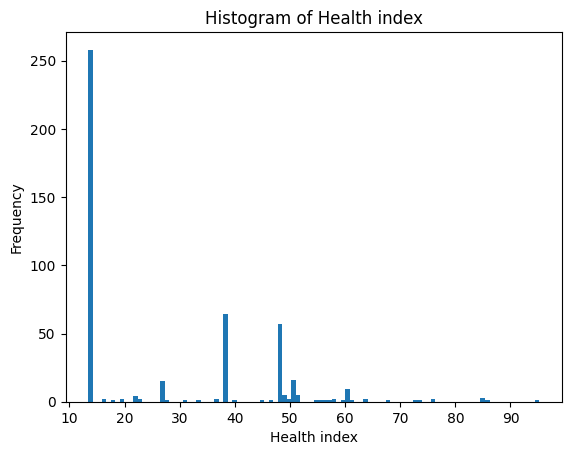

In [66]:
# print the unique values in the "Health index" column of health_index_augdata
print(health_index_augdata["HealthIndex"].unique())
 
# plot a histogram of "HealthIndex" column from combined_data
plt.hist(health_index_augdata["HealthIndex"], bins=100)
plt.xlabel("Health index")
plt.ylabel("Frequency")
plt.title("Histogram of Health index")
plt.show()

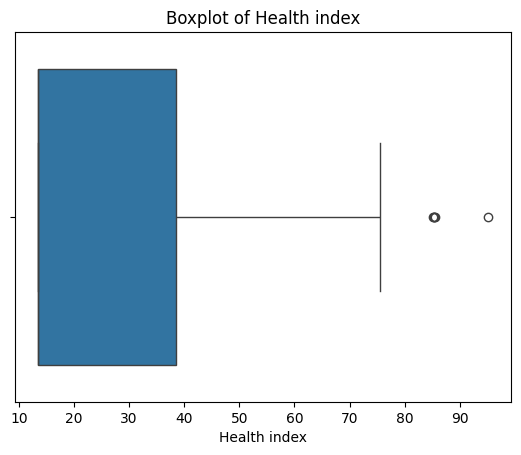

In [67]:
# plot a boxplot of "Health index" column from combined_data
sns.boxplot(x=health_index_augdata["HealthIndex"])
plt.xlabel("Health index")
plt.title("Boxplot of Health index")
plt.show()

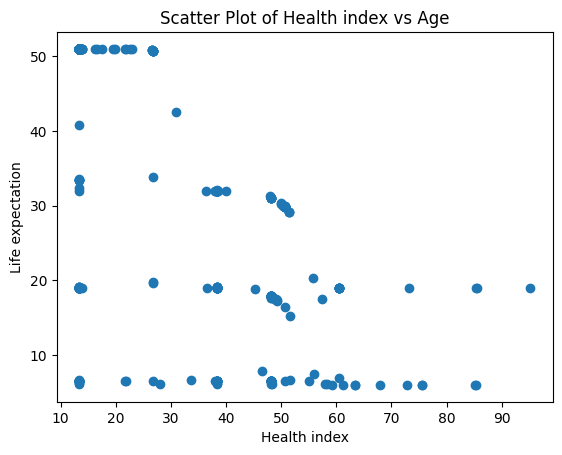

In [68]:
# plot a scatter plot of "Health index" and "Age" columns from combined_data
plt.scatter(health_index_augdata["HealthIndex"], health_index_augdata["Life expectation"])
plt.xlabel("Health index")
plt.ylabel("Life expectation")
plt.title("Scatter Plot of Health index vs Life expectation")
plt.show()

1. Data Preparation:
Before you can start building a model, ensure your data is in a usable format (e.g., a pandas DataFrame in Python). You need to combine both the DGA data and synthetic transformer data.

* DGA Data: Dissolved Gas Analysis (DGA) typically includes measurements of key gases (H2, CH4, C2H4, etc.).
* Synthetic Data: Your synthetic data may include transformer load, environmental conditions, and operational data.

In [69]:
# Define thresholds for DGA gases
gas_thresholds = {
    'Hydrogen': 150, 'Methane': 100, 'Ethane': 65, 'Ethylene': 50, 'Acethylene': 300, 'CO': 500, 'CO2': 3000
}

# Normalize the gas data
for gas in gas_thresholds.keys():
    health_index_augdata[gas + '_Normalized'] = health_index_augdata[gas] / gas_thresholds[gas]


In [70]:
# Select Features:
# Choose relevant features such as normalized DGA values, load, temperature, and any other operational data. 
# Select relevant features and the target (Health Index)
features = [
    'Hydrogen_Normalized', 'Methane_Normalized', 'Ethane_Normalized', 'Ethylene_Normalized', 
    'Acethylene_Normalized', 'CO_Normalized', 'CO2_Normalized', 
    'TransformerLoad', 'Temperature', 'Pressure', 'Vibration', 'OperatingHours'
]

X = health_index_augdata[features]   # Predictor variables
y = health_index_augdata['HealthIndex']  # Target variable


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 283.66466077284343
R-squared: 0.17175696523796624


In [72]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R-squared: {r2_rf}')


Random Forest Mean Squared Error: 145.14354729787237
Random Forest R-squared: 0.5762104036414208


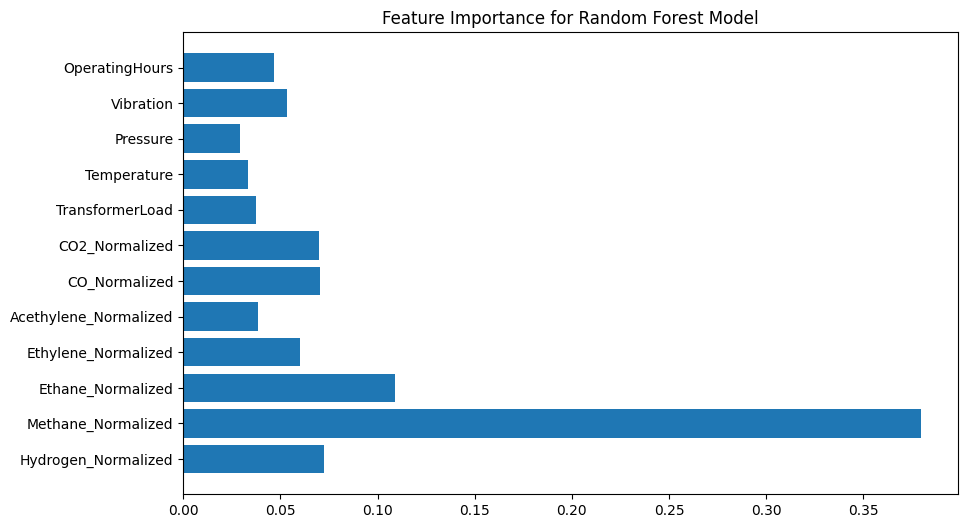

In [73]:
## To understand which features are contributing the most to the model's predictions, you can calculate feature importance.
# Feature Importance for Random Forest
import matplotlib.pyplot as plt

# Get feature importance scores
importance = rf_model.feature_importances_

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, importance)
plt.title('Feature Importance for Random Forest Model')
plt.show()


In [74]:
## Hyperparameter Tuning (Optional):
## You can use GridSearchCV or RandomizedSearchCV to optimize model parameters
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
}

# Initialize GridSearchCV with the Random Forest model
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Predict and evaluate the best model
y_pred_best_rf = best_rf_model.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f'Best Random Forest MSE: {mse_best_rf}')
print(f'Best Random Forest R-squared: {r2_best_rf}')


Best Random Forest MSE: 143.30805210895585
Best Random Forest R-squared: 0.581569675753137


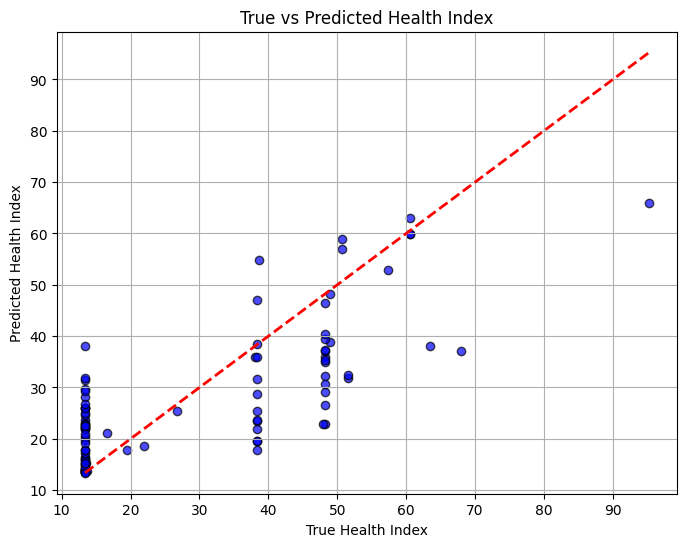

In [43]:
# y_test contains the true health index values
# y_pred_best_rf contains the predicted values from the best model
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best_rf, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)  # Reference line (y = x)
plt.title('True vs Predicted Health Index')
plt.xlabel('True Health Index')
plt.ylabel('Predicted Health Index')
plt.grid(True)
plt.show()


In [50]:
from scipy.stats import pearsonr, t as tdist
# Calculate the Pearson correlation coefficient
correlation, p_value = pearsonr(y_test, y_pred_best_rf)

# Print the correlation coefficient
print(f'Pearson correlation coefficient: {correlation}')

# Print the p-value
print(f'P-value: {p_value}')

Pearson correlation coefficient: 0.7688258118523961
P-value: 1.460898862977368e-19


In [75]:
print(health_index_augdata.columns)

Index(['Hydrogen', 'Oxigen', 'Nitrogen', 'Methane', 'CO', 'CO2', 'Ethylene',
       'Ethane', 'Acethylene', 'DBDS', 'Power factor', 'Interfacial V',
       'Dielectric rigidity', 'Water content', 'Life expectation',
       'TransformerID', 'InstallationDate', 'MaintenanceSchedule',
       'ReplacementHistory', 'MaintenanceID', 'MaintenanceType',
       'MaintenanceDate', 'TransformerLoad', 'Timestamp', 'Temperature',
       'Pressure', 'Vibration', 'Humidity', 'Precipitation', 'Alerts',
       'IncidentType', 'IncidentDetails', 'OperationID', 'OperatingHours',
       'LoadCondition', 'PerformanceMetrics', 'HealthIndex',
       'Hydrogen_Normalized', 'Methane_Normalized', 'Ethane_Normalized',
       'Ethylene_Normalized', 'Acethylene_Normalized', 'CO_Normalized',
       'CO2_Normalized'],
      dtype='object')


Methodology for Calculating Health Index Based on Dissolved Gas Analysis Reports
Dissolved Gas Analysis (DGA) is a crucial technique for assessing the internal condition of electrical transformers. By analyzing the concentrations of specific gases dissolved in the transformer's insulating oil, it's possible to identify potential faults or degradation.

Key Gases and Their Significance:

Hydrogen (H2): Indicates overheating due to high currents or overloading.
Oxygen (O2): Indicates exposure to air, possibly due to leaks or damaged seals.
Nitrogen (N2): Can indicate exposure to air, but is also present in the transformer's insulating oil.
Methane (CH4): Indicates overheating or arcing within the transformer.
Carbon Monoxide (CO): Indicates overheating, arcing, or corona discharge.
Carbon Dioxide (CO2): Indicates overheating or arcing, but can also be a product of oxidation.
Ethylene (C2H4): Indicates overheating or arcing, especially in the presence of paper insulation.
Ethane (C2H6): Indicates overheating or arcing, but is less sensitive than ethylene.
Acetylene (C2H2): Indicates severe arcing or short circuits.
DBDS: Indicates the presence of sulfur-containing compounds, which can be a sign of insulation degradation.
Power Factor: Measures the energy loss in the transformer's insulation.
Interfacial Voltage: Measures the ability of the insulating oil to withstand electrical stress.
Dielectric Rigidity: Measures the ability of the insulating oil to withstand an electric field without breaking down.
Water Content: Measures the amount of water present in the insulating oil, which can reduce its dielectric strength.
Health Index Calculation Methodology:

Data Normalization: 

Normalize the gas concentrations to a common reference (e.g., ppm) to ensure comparability.
Weighting: Assign weights to each gas based on its sensitivity to different fault types. For example, acetylene might have a higher weight due to its strong association with severe arcing.

Gas Ratio Analysis: Calculate ratios between specific gases to identify fault patterns. Common ratios include:
CO/H2: Indicates the severity of overheating.
CH4/H2: Indicates the type of fault (overheating or arcing).
C2H4/H2: Indicates the severity of overheating in paper-insulated transformers.

Fault Classification: Use established fault classification models or expert systems to categorize the potential faults based on the gas concentrations and ratios.
Health Index Calculation: Combine the normalized gas concentrations, weighted values, and fault classification results into a single health index. This index can be calculated using various methods, such as:
Weighted Sum: Sum the weighted gas concentrations and normalized ratios.
Fuzzy Logic: Use fuzzy logic rules to combine the gas concentrations and fault classifications into a single index.
Machine Learning: Train a machine learning model on historical DGA data to predict a health index based on the gas concentrations and other relevant features.

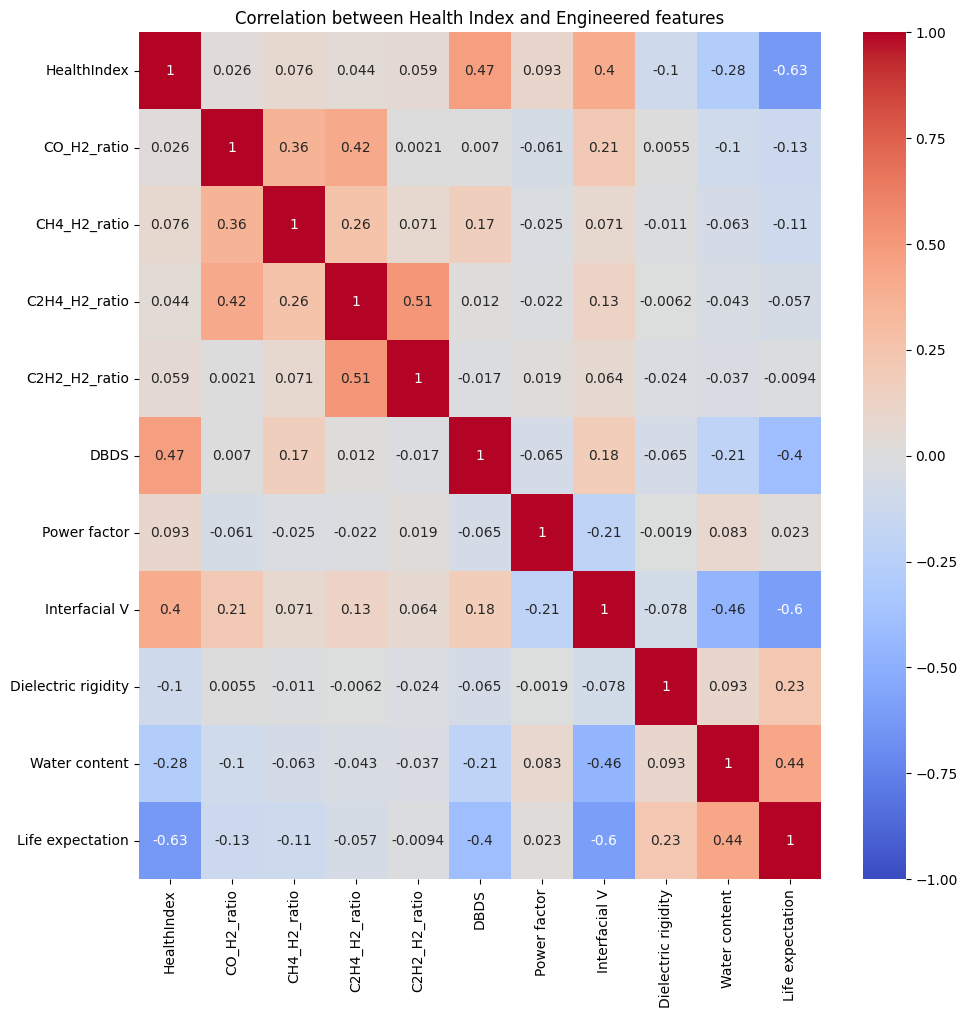

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Feature engineering
health_index_augdata['Hydrogen'] = health_index_augdata['Hydrogen'].replace(0, 0.0001)
health_index_augdata['CO_H2_ratio'] = health_index_augdata['CO'] / health_index_augdata['Hydrogen']
health_index_augdata['CH4_H2_ratio'] = health_index_augdata['Methane'] / health_index_augdata['Hydrogen']
health_index_augdata['C2H4_H2_ratio'] = health_index_augdata['Ethylene'] / health_index_augdata['Hydrogen']
health_index_augdata['C2H2_H2_ratio'] = health_index_augdata['Acethylene'] / health_index_augdata['Hydrogen']

# Checking correlations for relevant numeric features (Health Index, Load, Environmental conditions, Operating hours)
correlation_matrix = health_index_augdata[['HealthIndex', 'CO_H2_ratio', 'CH4_H2_ratio', 'C2H4_H2_ratio', 'C2H2_H2_ratio', 'DBDS',
                                     'Power factor', 'Interfacial V', 'Dielectric rigidity', 'Water content', 'Life expectation']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(11, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Health Index and Engineered features')
plt.show()

In [85]:
# Split data
X = health_index_augdata.drop('HealthIndex', axis=1)
X = X[['CO_H2_ratio', 'CH4_H2_ratio', 'C2H4_H2_ratio', 'C2H2_H2_ratio', 'DBDS',
                                     'Power factor', 'Interfacial V', 'Dielectric rigidity', 'Water content', 'Life expectation']]
y = health_index_augdata['HealthIndex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictios
y_pred = model.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 182.9596433533052


In [86]:
## Hyperparameter Tuning (Optional):
## You can use GridSearchCV or RandomizedSearchCV to optimize model parameters
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
}

# Initialize GridSearchCV with the Random Forest model
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Predict and evaluate the best model
y_pred_best_rf = best_rf_model.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f'Best Random Forest MSE: {mse_best_rf}')
print(f'Best Random Forest R-squared: {r2_best_rf}')

Best Random Forest MSE: 63.20481265105269
Best Random Forest R-squared: 0.8154548201420327


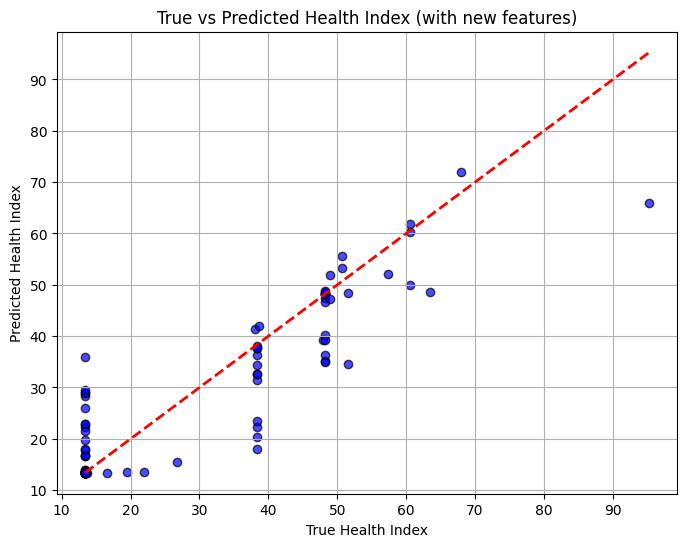

In [87]:
# y_test contains the true health index values
# y_pred_best_rf contains the predicted values from the best model
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best_rf, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)  # Reference line (y = x)
plt.title('True vs Predicted Health Index (with new features)')
plt.xlabel('True Health Index')
plt.ylabel('Predicted Health Index')
plt.grid(True)
plt.show()